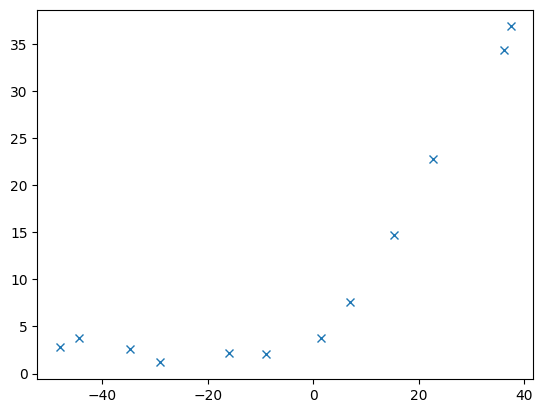

In [2]:
#1.1
from mat4py import loadmat
import matplotlib.pyplot as plt
import numpy as np
import math
data = loadmat('ex5data1.mat')
plt.plot(data['X'],data['y'],'x')

In [3]:
import pandas as pd
for i,j in zip(data['X'],data['y']):
    print(i,j)
df = pd.DataFrame(data['X'], columns=['x1'])
df1=pd.DataFrame(list(zip(data['X'],data['y'])), columns=['x1','y'])
X = pd.concat([pd.Series(1, index=df.index, name='x0'), df], axis=1)
print(X)
y=pd.DataFrame(data['y'], columns=['y'])
print(df1)

[-15.93675813378541] [2.1343105067296686]
[-29.152979217238133] [1.1732566787564553]
[36.18954862666253] [34.35910918053895]
[37.49218733199513] [36.83795516371235]
[-48.058829452570066] [2.808965074479856]
[-8.941457938049755] [2.121072476666392]
[15.307792889226079] [14.710268306562307]
[-34.70626581132249] [2.614184386432259]
[1.3891543686358903] [3.7401716656949393]
[-44.38375985168692] [3.731691310543067]
[7.013502082404112] [7.627658852038035]
[22.762748919711303] [22.752428302242212]
    x0         x1
0    1 -15.936758
1    1 -29.152979
2    1  36.189549
3    1  37.492187
4    1 -48.058829
5    1  -8.941458
6    1  15.307793
7    1 -34.706266
8    1   1.389154
9    1 -44.383760
10   1   7.013502
11   1  22.762749
                       x1                     y
0    [-15.93675813378541]  [2.1343105067296686]
1   [-29.152979217238133]  [1.1732566787564553]
2     [36.18954862666253]   [34.35910918053895]
3     [37.49218733199513]   [36.83795516371235]
4   [-48.058829452570066]   [2

In [4]:
#1.2
lam=0.083
def hypothesis(theta, X):
    return np.dot(theta,X)

def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return (1/(2*len(X))) * np.sum((y1-y)**2 + lam*theta.iloc[1][0]**2)
theta=[1,1]
theta = pd.DataFrame(theta)
J=cost(X,y,theta)
print(J)

y    303.993026
dtype: float64


/usr/local/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [5]:
#1.3
lam=0.083
m=len(X)
def hypothesis(theta, X):
    return np.dot(theta,X)
y1=hypothesis(X, theta)
dJ0=1/m*np.dot((y1-y).T,X.iloc[:,0])
dJ1=1/m*np.dot((y1-y).T,X.iloc[:,1])+lam/len(X)*theta.iloc[1][0]
print(dJ0,dJ1)
    



[-15.30301567] [598.17432751]


/var/folders/bp/m0xw4ldn5k7665hjp10sj11h0000gn/T/ipykernel_1647/3141949341.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.0229545235113018' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  theta.iloc[k, 0] -= (alpha/m) * np.dot((h-y).T,X.iloc[:, k])


           0
0  10.268441
1   0.350870


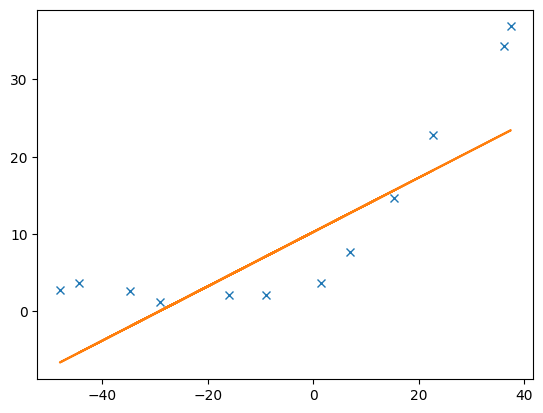

In [6]:
#1.3

theta=[1,1]
def hypothesis(theta, X):
    return np.dot(theta,X)

def gradient_descent(X, y, theta, alpha, epochs):
    m = len(X)
    for i in range(0, epochs):
        #for j in range(0,6):
        theta = pd.DataFrame(theta)
        h = hypothesis(X,theta)
        for k in range(0, theta.shape[0]):
            theta.iloc[k, 0] -= (alpha/m) * np.dot((h-y).T,X.iloc[:, k])
        theta = pd.DataFrame(theta)
    return theta
theta=gradient_descent(X, y, theta, 0.0015, 1000)
print(theta)
h=hypothesis(X, theta)
plt.plot(data['X'],data['y'],'x')
plt.plot(data['X'],h,)

In [7]:
## 3.1
import seaborn as sns
sns.set(style='whitegrid',palette='hsv')
theta=np.random.rand(9)
X["x2"] = X["x1"]**2
X["x3"] = X["x1"]**3
X["x4"] = X["x1"]**4
X["x5"] = X["x1"]**5
X["x6"] = X["x1"]**6
X["x7"] = X["x1"]**6
X["x8"] = X["x1"]**8

X["x1"] =( X["x1"]-X["x1"].mean())/X["x1"].max()
X["x2"] =( X["x2"]-X["x2"].mean())/X["x2"].max()
X["x3"] =( X["x3"]-X["x3"].mean())/X["x3"].max()
X["x4"] =( X["x4"]-X["x4"].mean())/X["x4"].max()
X["x5"] =( X["x5"]-X["x5"].mean())/X["x5"].max()
X["x6"] =( X["x6"]-X["x6"].mean())/X["x6"].max()
X["x7"] =( X["x7"]-X["x7"].mean())/X["x7"].max()
X["x8"] =( X["x8"]-X["x8"].mean())/X["x8"].max()

def hypothesis(theta, X):
    return np.dot(theta,X)

def cost(X, y, theta,lam):
    y1 = hypothesis(X, theta)
    return (1/(2*len(X))) * np.sum((y1-y)**2 + lam*theta.iloc[1][0]**2)
theta = pd.DataFrame(theta)
J=cost(X,y,theta,0)
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(X)
    for i in range(0, epochs):
        #for j in range(0,6):
        theta = pd.DataFrame(theta)
        h = hypothesis(X,theta)
        for k in range(0, theta.shape[0]):
            theta.iloc[k, 0] -= (alpha/m) * np.dot((h-y).T,X.iloc[:, k])
        theta = pd.DataFrame(theta)
    return theta
theta=gradient_descent(X, y, theta, 0.00015, 10000)

h=hypothesis(X, theta)


/usr/local/Cellar/jupyterlab/4.0.6/libexec/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [8]:

def polyFeatures(X, p):

    X_poly = np.zeros((len(X), p))
    for r in range(0, len(X)):
        for c in range(0, p):
            X_poly[r][c] = np.power(X[r], c+1)
    return X_poly
def featureNormalize(X):

    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma


def plotFit(polyFeatures, min_x, max_x, mu, sigma, theta, p):

    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)

    X_poly = polyFeatures(x, p)
    X_poly -= mu
    X_poly /= sigma
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)

    plt.plot(x, np.dot(X_poly, theta), '--', lw=2)


/var/folders/bp/m0xw4ldn5k7665hjp10sj11h0000gn/T/ipykernel_77597/4093308027.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_poly[r][c] = np.power(X[r], c+1)


(-20.0, 50.0)

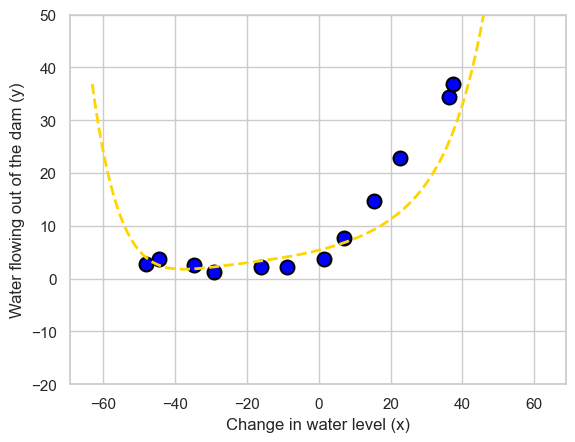

In [731]:
p = 8
X, y = data['X'], data['y']
Xtest, ytest = data['Xtest'], data['ytest']
Xval, yval = data['Xval'], data['yval']

X_poly = polyFeatures(data['X'], p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)

X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((len(ytest), 1)), X_poly_test], axis=1)

X_poly_val = polyFeatures(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((len(yval), 1)), X_poly_val], axis=1)
plt.plot(data['X'], data['y'], 'bo', ms=10, mew=1.5, mec='k')

plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim([-20, 50])


          0
0  8.837465
1  5.122205
2  3.033889
3  3.609513
4  1.674762
5  2.650654
6  1.883479
7  1.223245
8  1.819988


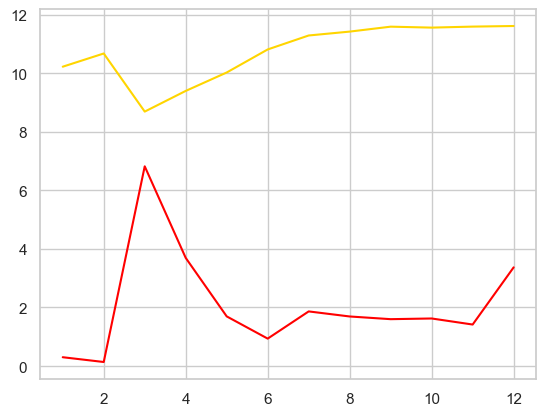

In [732]:
def gradient_descent1(X, y, theta, alpha, epochs):
    m = len(X)
    for i in range(0, epochs):
        theta = pd.DataFrame(theta)
        h = hypothesis(X,theta)
        for k in range(0, theta.shape[0]):
            theta.iloc[k, 0] -= (alpha/m) * np.dot((h-y).T,X[:,k])
        theta = pd.DataFrame(theta)
    return theta
def learningCurve(X, y, Xval, yval, lambda_):
    m = len(y)

    error_train = np.zeros(m)
    error_val   = np.zeros(m)


    for i in range(1, m+1):
        X_i = X[:i, :]
        y_i = y[:i]
        # use the line from the above
        theta_i = gradient_descent1(X_i, y_i,theta, 0.00015,1000)

        J_train_i = cost(X_i, y_i, theta_i, lambda_)
        error_train[i-1] = J_train_i  # note the i-1
        
        J_cross_eval_i = cost(Xval, yval, theta_i, lambda_)
        error_val[i-1] = J_cross_eval_i  # note the i-1

    return error_train, error_val
print(theta)
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval,0)
plt.plot(np.arange(1, 1+m), error_train,'r-', np.arange(1, 1+m), error_val)

In [733]:
theta=np.random.rand(9)
def gradient_descent2(X, y, theta, alpha, epochs,lam):
    m = len(X)
    for i in range(0, epochs):
        theta = pd.DataFrame(theta)
        h = hypothesis(X,theta)
        for k in range(0, theta.shape[0]):
            if k==0:
                theta.iloc[k, 0] -= (alpha/m) * np.dot((h-y).T,X[:, k])
            else:
                theta.iloc[k, 0] -= ((alpha/m) * np.dot((h-y).T,X[:, k])+lam/m*theta.iloc[k,0])
        theta = pd.DataFrame(theta)
    return theta
theta=gradient_descent2(X_poly, y, theta, 0.3, 2000,1)
print(theta)

           0
0  11.217589
1   6.467114
2   3.771422
3   3.724346
4   2.213725
5   2.208072
6   1.319371
7   1.352971
8   0.762449


/var/folders/bp/m0xw4ldn5k7665hjp10sj11h0000gn/T/ipykernel_77597/4093308027.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_poly[r][c] = np.power(X[r], c+1)


(-20.0, 50.0)

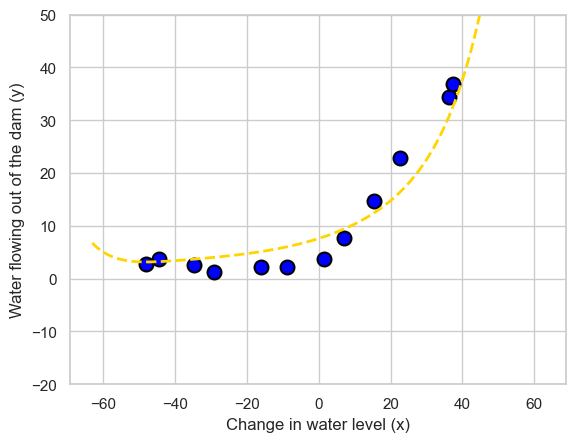

In [734]:
plt.plot(data['X'], data['y'], 'bo', ms=10, mew=1.5, mec='k')

plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim([-20, 50])


In [736]:

def validationCurve(X, y, Xval, yval):

    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    for lindex, l in enumerate(lambda_vec):
 
        theta_l = gradient_descent2(X, y, theta, 0.001, 2000,l)
 
        J_train_i = cost(X, y, theta_l, 0)
        error_train[lindex] = J_train_i 
        
        J_cross_eval_i = cost(Xval, yval, theta_l, 0)
        error_val[lindex] = J_cross_eval_i
        

    # ============================================================
    return lambda_vec, error_train, error_val

Text(0, 0.5, 'Error')

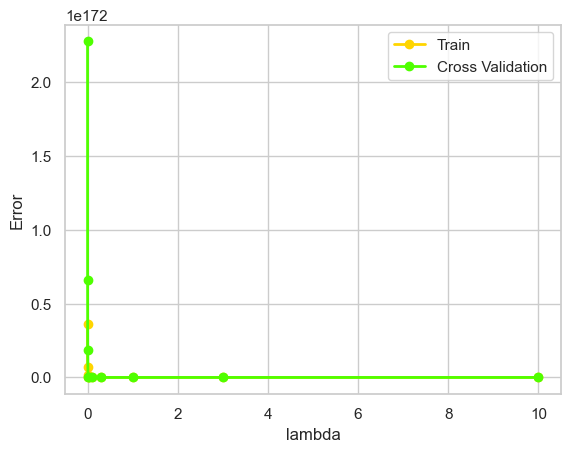

In [737]:

lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

plt.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')


In [738]:
theta=np.random.rand(9)
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_test, ytest)

print('lambda\t\tTrain Error\tTest Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))


lambda		Train Error	Test Error
 0.000000	4.521588	4.442893
 0.001000	2.846166	2.704429
 0.003000	4.705374	3.545951
 0.010000	15.655075	16.620192
 0.030000	36.606009	45.850177
 0.100000	57.977077	75.512048
 0.300000	69.514789	91.186968
 1.000000	75.162713	99.063886
 3.000000	77.041339	101.746589
 10.000000	77.734040	102.745343
